In [6]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [7]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

# import os 
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [8]:
dogproblem = BayesNet()
dogproblem.load_from_bifxml('testing/dog_problem.BIFXML')

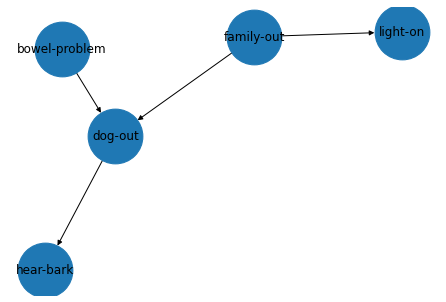

In [9]:
dogproblem.draw_structure()

In [10]:
dogproblem.get_all_variables()

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']

In [11]:
dogproblem.get_all_cpts()

{'light-on':    family-out  light-on     p
 0       False     False  0.60
 1       False      True  0.40
 2        True     False  0.05
 3        True      True  0.95,
 'bowel-problem':    bowel-problem     p
 0          False  0.01
 1           True  0.99,
 'dog-out':    family-out  bowel-problem  dog-out     p
 0       False          False    False  0.99
 1       False          False     True  0.01
 2       False           True    False  0.97
 3       False           True     True  0.03
 4        True          False    False  0.90
 5        True          False     True  0.10
 6        True           True    False  0.30
 7        True           True     True  0.70,
 'hear-bark':    dog-out  hear-bark     p
 0    False      False  0.70
 1    False       True  0.30
 2     True      False  0.01
 3     True       True  0.99,
 'family-out':    family-out     p
 0       False  0.15
 1        True  0.85}

In [12]:
dogproblem.get_children('light-on')

[]

In [13]:
dogproblem.get_all_edges()

[('bowel-problem', 'dog-out'),
 ('dog-out', 'hear-bark'),
 ('family-out', 'light-on'),
 ('family-out', 'dog-out')]

## a) d-separation 

In [14]:
reasoner = BNReasoner(dogproblem)

In [15]:
x = ['bowel-problem', 'family-out']
y = ['hear-bark', 'light-on']
z = ['dog-out']
reasoner.d_separation(x, y, z)

False

## b) Ordering

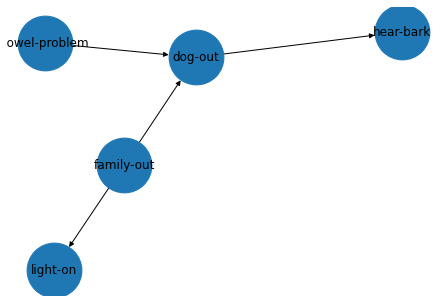

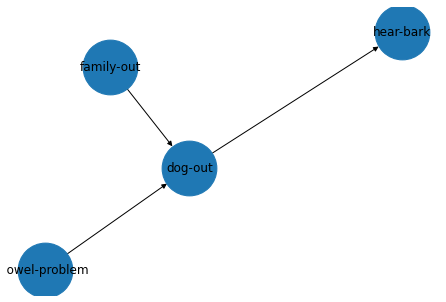

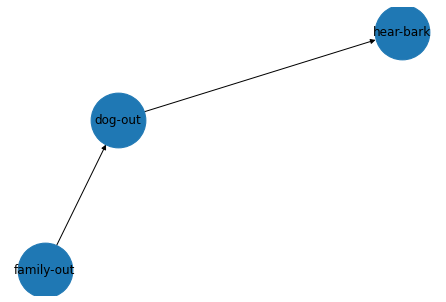

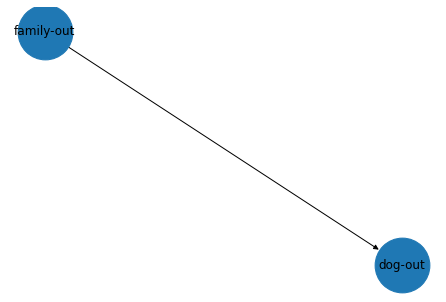

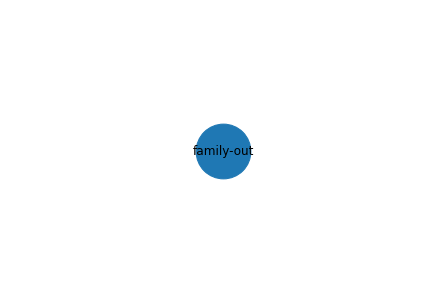

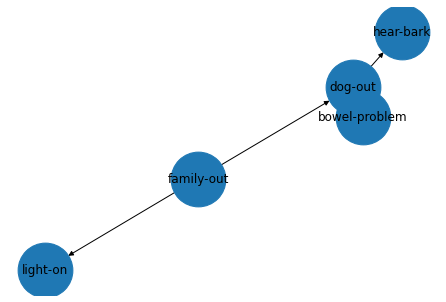

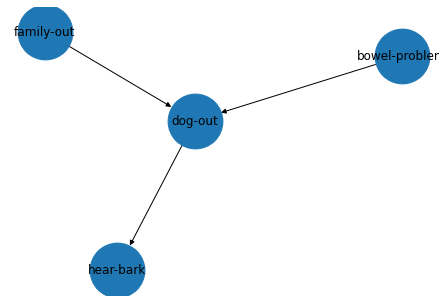

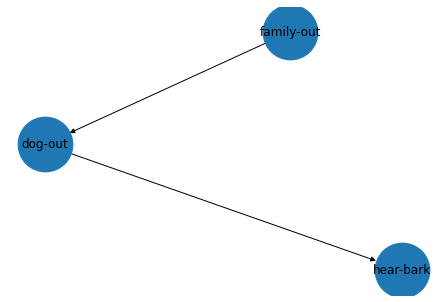

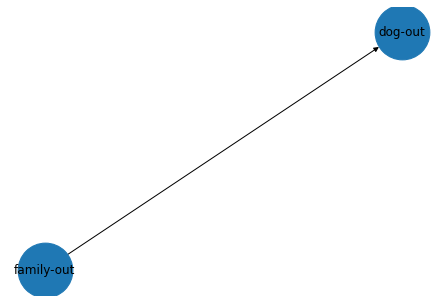

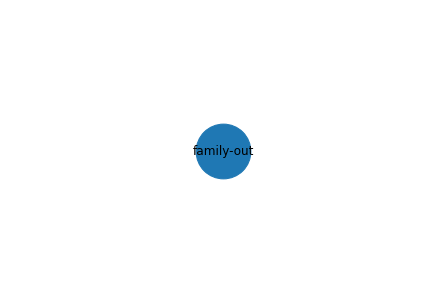

['light-on', 'bowel-problem', 'hear-bark', 'dog-out', 'family-out']

In [16]:
reasoner.ordering_mindegree()

reasoner.ordering_minfull()

## d) Marginal distributions

summing-out: 

In [17]:
factor = dogproblem.get_cpt('dog-out')
factor

,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


In [18]:
reasoner.sum_out(factor, ['bowel-problem'])

,family-out,dog-out,p
0,False,False,1.96
1,False,True,0.04
2,True,False,1.20
3,True,True,0.80


In [19]:
reasoner.multiply(factor, ['bowel-problem'])

,family-out,dog-out,p
0,False,False,0.9603
1,False,True,0.0003
2,True,False,0.2700
3,True,True,0.0700
